In [1]:
# loading the data
import pandas as pd 
path =r"C:\Users\New User\OneDrive\Desktop\power_saving\data\household_power_consumption.txt"
df=pd.read_csv(path,sep=';')
df

C:\Users\New User\AppData\Local\Temp\ipykernel_4768\1323732877.py:4: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(path,sep=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [2]:
# exploring the columns values and datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [3]:
# Changing object columns to numeric columns

obj_to_numeric = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2']

for cols in obj_to_numeric:
    df[cols] = pd.to_numeric(df[cols], errors='coerce')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [5]:

# To convert the date column object in datetime format
df["Date"] = pd.to_datetime(df["Date"], format='%d/%m/%Y')

# To convert the time column object into datetime  
df["Time"] = pd.to_datetime(df["Time"], format='%H:%M:%S').dt.time


# Add the day column from date column
df["Day"] = df["Date"].dt.day

# Add the month column from date column
df["Month"] = df["Date"].dt.month

# Add the year column from date column
df["Year"] = df["Date"].dt.year

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   Day                    int32         
 10  Month                  int32         
 11  Year                   int32         
dtypes: datetime64[ns](1), float64(7), int32(3), object(1)
memory usage: 166.2+ MB


In [7]:
# To convert date column datetime into integer to calculate correlation
df["Date"] = df["Date"].dt.strftime("%Y%m%d").astype(int)  

# To convert time cloumn datetime into integer to calculate correlation
df["Time"] = pd.to_datetime(df["Time"], format="%H:%M:%S").dt.strftime("%H%M%S").astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   int64  
 1   Time                   int64  
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
 9   Day                    int32  
 10  Month                  int32  
 11  Year                   int32  
dtypes: float64(7), int32(3), int64(2)
memory usage: 166.2 MB


In [9]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
2075254    False
2075255    False
2075256    False
2075257    False
2075258    False
Length: 2075259, dtype: bool

In [10]:
df.isna().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Day                          0
Month                        0
Year                         0
dtype: int64

In [11]:
# check the null values   
df=df[df.columns[(df.isna().sum())/len(df)<=0.3]]
# dealing with null values
df= df.ffill()
df= df.bfill()
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day,Month,Year
0,20061216,172400,4.216,0.418,234.84,18.4,0.0,1.0,17.0,16,12,2006
1,20061216,172500,5.360,0.436,233.63,23.0,0.0,1.0,16.0,16,12,2006
2,20061216,172600,5.374,0.498,233.29,23.0,0.0,2.0,17.0,16,12,2006
3,20061216,172700,5.388,0.502,233.74,23.0,0.0,1.0,17.0,16,12,2006
4,20061216,172800,3.666,0.528,235.68,15.8,0.0,1.0,17.0,16,12,2006
...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,20101126,205800,0.946,0.000,240.43,4.0,0.0,0.0,0.0,26,11,2010
2075255,20101126,205900,0.944,0.000,240.00,4.0,0.0,0.0,0.0,26,11,2010
2075256,20101126,210000,0.938,0.000,239.82,3.8,0.0,0.0,0.0,26,11,2010
2075257,20101126,210100,0.934,0.000,239.70,3.8,0.0,0.0,0.0,26,11,2010


In [12]:
df.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Day                      0
Month                    0
Year                     0
dtype: int64

In [13]:

#  standardisation
for col in ['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']:
    vals= (df[col]-df[col].mean())/df[col].std()
    df= df[(vals>=-3)&(vals<=3)]
df


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day,Month,Year
15,20061216,173900,3.384,0.282,237.14,14.2,0.0,0.0,17.0,16,12,2006
16,20061216,174000,3.270,0.152,236.73,13.8,0.0,0.0,17.0,16,12,2006
17,20061216,174100,3.430,0.156,237.06,14.4,0.0,0.0,17.0,16,12,2006
18,20061216,174200,3.266,0.000,237.13,13.8,0.0,0.0,18.0,16,12,2006
25,20061216,174900,3.248,0.000,236.66,13.6,0.0,0.0,17.0,16,12,2006
...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,20101126,205800,0.946,0.000,240.43,4.0,0.0,0.0,0.0,26,11,2010
2075255,20101126,205900,0.944,0.000,240.00,4.0,0.0,0.0,0.0,26,11,2010
2075256,20101126,210000,0.938,0.000,239.82,3.8,0.0,0.0,0.0,26,11,2010
2075257,20101126,210100,0.934,0.000,239.70,3.8,0.0,0.0,0.0,26,11,2010


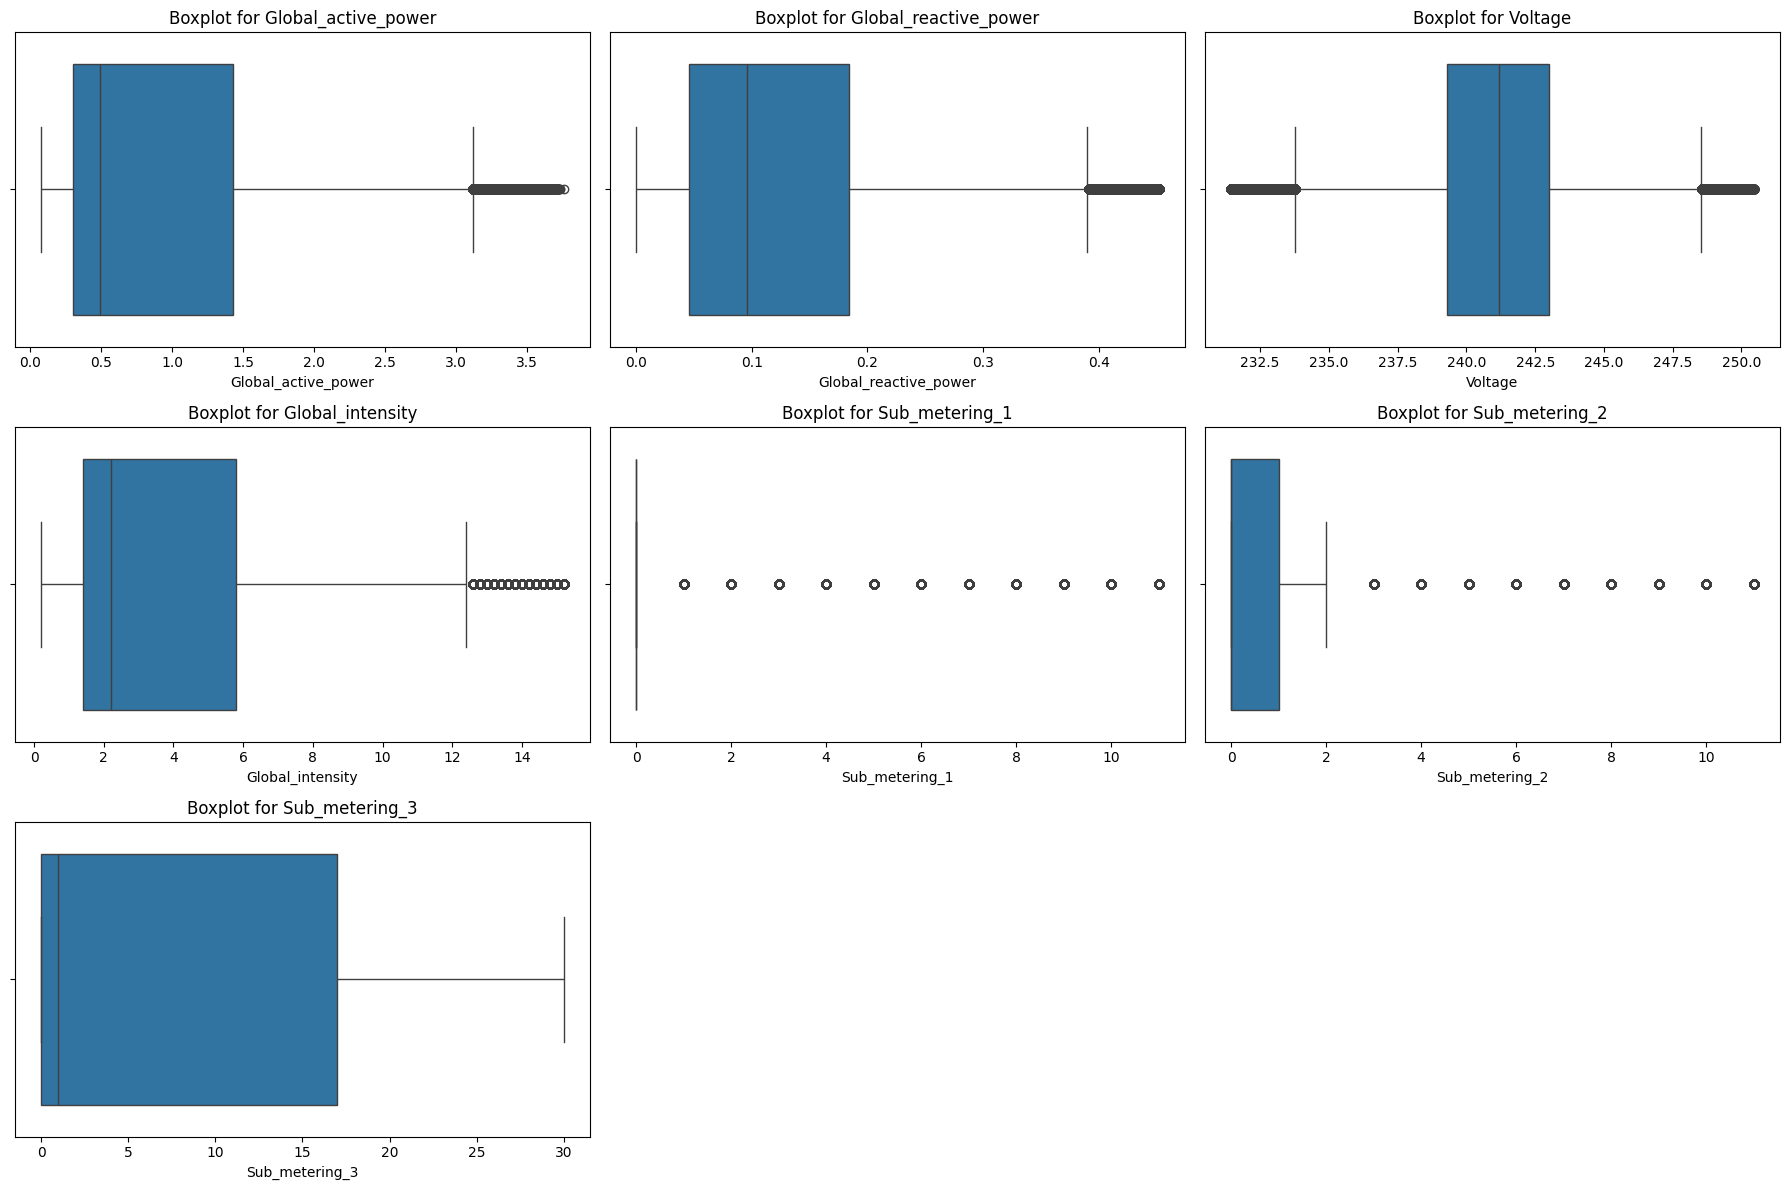

In [14]:
# Outlier Detection using charts
import seaborn as sns 
import matplotlib.pyplot as plt 
# Define the columns of interest (7 columns)
cols_to_check = ['Global_active_power','Global_reactive_power', 'Voltage', 'Global_intensity',
                 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Create a boxplot for each column of interest
plt.figure(figsize=(18, 12))  # Increase the figure size for better clarity
for i, col in enumerate(cols_to_check, 1):
    plt.subplot(3, 3, i)  # 3 rows x 3 columns of subplots
    sns.boxplot(x=df[col])  
    plt.title(f'Boxplot for {col}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [15]:
# Scaling 
from sklearn.preprocessing import StandardScaler

# Columns to scale
feature_cols = ['Global_active_power','Global_reactive_power', 'Voltage', 'Global_intensity',
                'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

#Apply scaling directly on df
scaler = StandardScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day,Month,Year
15,20061216,173900,3.298548,1.689974,-1.315002,3.331774,-0.171088,-0.513448,1.325699,16,12,2006
16,20061216,174000,3.147367,0.378883,-1.450998,3.203708,-0.171088,-0.513448,1.325699,16,12,2006
17,20061216,174100,3.359551,0.419224,-1.341538,3.395807,-0.171088,-0.513448,1.325699,16,12,2006
18,20061216,174200,3.142062,-1.154086,-1.318319,3.203708,-0.171088,-0.513448,1.446440,16,12,2006
25,20061216,174900,3.118192,-1.154086,-1.474217,3.139675,-0.171088,-0.513448,1.325699,16,12,2006
...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,20101126,205800,0.065395,-1.154086,-0.223722,0.066081,-0.171088,-0.513448,-0.726907,26,11,2010
2075255,20101126,205900,0.062743,-1.154086,-0.366351,0.066081,-0.171088,-0.513448,-0.726907,26,11,2010
2075256,20101126,210000,0.054786,-1.154086,-0.426057,0.002048,-0.171088,-0.513448,-0.726907,26,11,2010
2075257,20101126,210100,0.049482,-1.154086,-0.465860,0.002048,-0.171088,-0.513448,-0.726907,26,11,2010


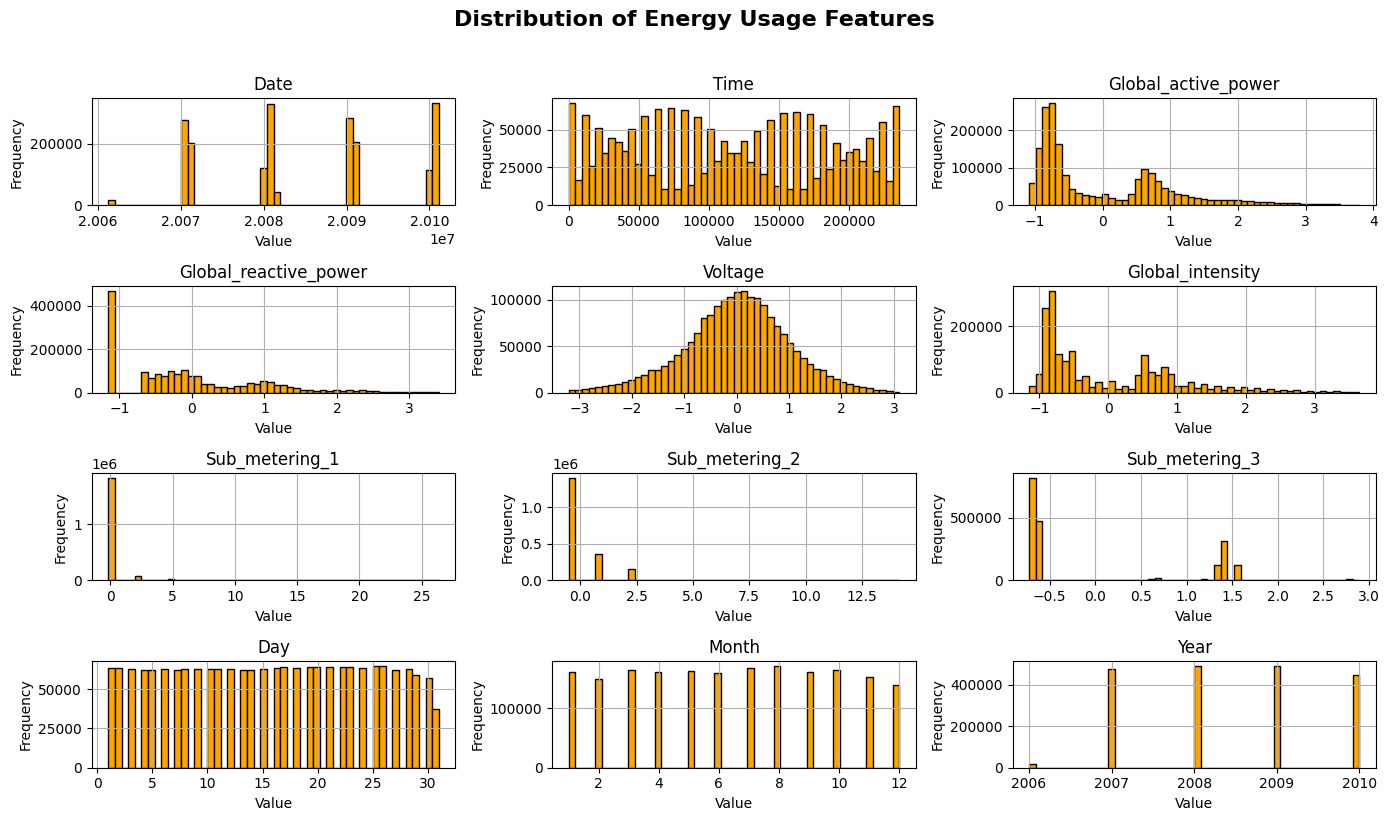

In [16]:
# Create histograms for data to find the data distribution

import seaborn as sns
import matplotlib.pyplot as plt

axes = df.hist(figsize=(14, 8), bins=50, color='orange', edgecolor='black')

# Loop through each subplot and add labels
for ax in axes.flatten():
    ax.set_xlabel("Value")  # X-axis label
    ax.set_ylabel("Frequency")  # Y-axis label
    ax.set_title(ax.get_title())  # Keep original title
# Add a main title for the entire figure

plt.suptitle("Distribution of Energy Usage Features", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


In [17]:
#correlation
df.corr()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day,Month,Year
Date,1.000000,0.008682,0.005663,0.045413,0.250307,0.000069,0.020413,0.032863,0.072460,-0.026619,-0.057786,0.999546
Time,0.008682,1.000000,0.263968,0.093594,-0.146173,0.265503,0.095881,0.038083,0.105410,-0.000802,0.002047,0.008602
Global_active_power,0.005663,0.263968,1.000000,0.154868,-0.296272,0.998437,0.173212,0.067607,0.760568,-0.005297,-0.039717,0.006852
Global_reactive_power,0.045413,0.093594,0.154868,1.000000,-0.065802,0.179772,0.068138,0.382550,0.053386,0.000350,0.023070,0.044616
Voltage,0.250307,-0.146173,-0.296272,-0.065802,1.000000,-0.310389,-0.049189,-0.030298,-0.233711,0.023826,-0.027226,0.250555
Global_intensity,0.000069,0.265503,0.998437,0.179772,-0.310389,1.000000,0.179762,0.077582,0.750758,-0.006034,-0.038144,0.001224
Sub_metering_1,0.020413,0.095881,0.173212,0.068138,-0.049189,0.179762,1.000000,0.035262,0.120008,-0.005805,-0.016606,0.020874
Sub_metering_2,0.032863,0.038083,0.067607,0.382550,-0.030298,0.077582,0.035262,1.000000,0.023495,0.002093,0.002930,0.032700
Sub_metering_3,0.072460,0.105410,0.760568,0.053386,-0.233711,0.750758,0.120008,0.023495,1.000000,-0.008624,-0.034207,0.073338
Day,-0.026619,-0.000802,-0.005297,0.000350,0.023826,-0.006034,-0.005805,0.002093,-0.008624,1.000000,0.017861,-0.027880


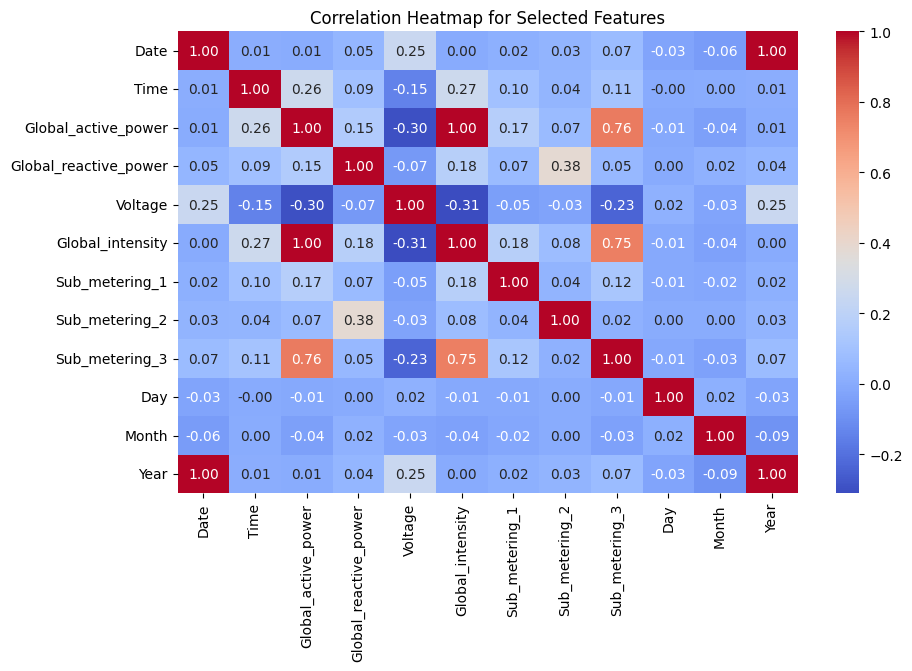

In [18]:
# Heatmap for correlation

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Selected Features')
plt.show()

In [19]:
# Feature: 60-minute rolling average power
df['Rolling_avg_power'] = df['Global_active_power'].rolling(window=60, min_periods=1).mean()
df['Rolling_avg_power']

15         3.298548
16         3.222957
17         3.268489
18         3.236882
25         3.213144
             ...   
2075254    0.366918
2075255    0.354098
2075256    0.342649
2075257    0.328946
2075258    0.314270
Name: Rolling_avg_power, Length: 1917809, dtype: float64

In [20]:
# model traning
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X = df.drop(['Global_active_power'],axis=1)
y  = df['Global_active_power']
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2)

models = {LinearRegression(),
          RandomForestRegressor(n_estimators=100, random_state=42),
          GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
          MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)}
for model in models:
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, test_pred)
    mae = mean_absolute_error(y_test, test_pred)
    r2 = r2_score(y_test, test_pred)
    
    print(f'*****{type(model).__name__}*****')
    print(f"   RMSE: {mse**0.5:.4f}")
    print(f"   MAE:  {mae:.4f}")
    print(f"   R² Score: {r2:.4f}")
    
  

*****GradientBoostingRegressor*****
   RMSE: 0.0391
   MAE:  0.0240
   R² Score: 0.9985
*****LinearRegression*****
   RMSE: 0.0448
   MAE:  0.0297
   R² Score: 0.9980
*****MLPRegressor*****
   RMSE: 0.0349
   MAE:  0.0220
   R² Score: 0.9988
*****RandomForestRegressor*****
   RMSE: 0.0280
   MAE:  0.0119
   R² Score: 0.9992


In [ ]:
# Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}
# Training and Evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    print(f"\n {name}")
    print(f"   RMSE: {mse**0.5:.4f}")
    print(f"   MAE:  {mae:.4f}")
    print(f"   R² Score: {r2:.4f}

In [23]:

# Create a DataFrame to compare actual vs predicted
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': test_pred
})

# Check for last few rows
print("\n Actual vs Predicted values (on test set):")
print(comparison_df.head(10))  # show first 10 comparisons


 Actual vs Predicted values (on test set):
     Actual  Predicted
0 -0.762122  -0.756048
1 -0.796602  -0.794506
2  1.672689   1.655290
3  1.030832   0.991021
4  0.884956   0.924130
5  2.200496   2.152622
6 -0.783340  -0.782916
7  1.388893   1.358046
8  0.781516   0.813503
9  0.537505   0.532996


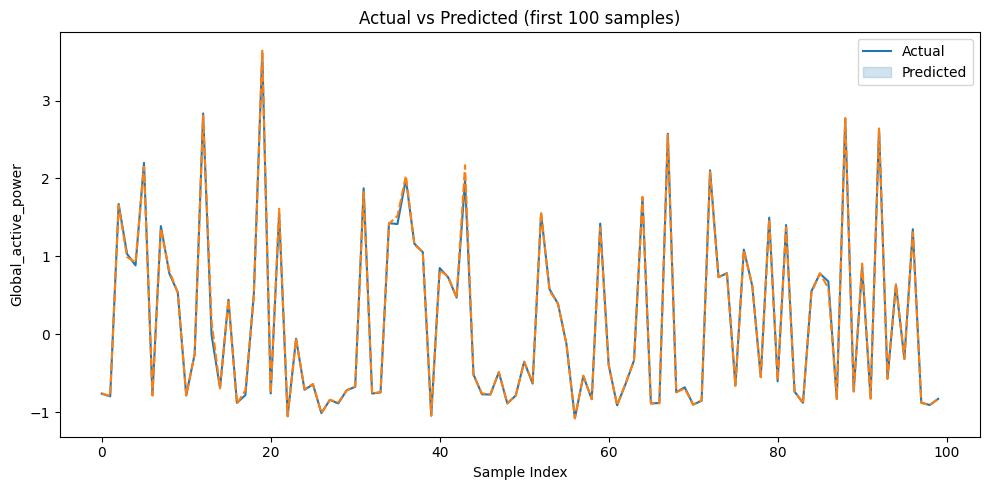

In [24]:
# Optionally visualize
plt.figure(figsize=(10, 5))
sns.lineplot(data=comparison_df.head(100))  # Plot first 100 for clarity
plt.title('Actual vs Predicted (first 100 samples)')
plt.xlabel('Sample Index')
plt.ylabel('Global_active_power')
plt.legend(['Actual', 'Predicted'])
plt.tight_layout()
plt.show()
# scaled units not in kw